# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно определить рыночную стоимость объектов недвижимости.
Наша задача — установить параметры, которые влияют на цену, что позволит построить автоматизированную систему,которая отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

 Описание данных:
 * `airports_nearest` - расстояние до ближайшего аэропорта в метрах (м)
 * `balcony` - число балконов
 * `ceiling_height` — высота потолков (м)
 * `cityCenters_nearest` — расстояние до центра города (м)
 * `days_exposition`— сколько дней было размещено объявление (от публикации до снятия)
 * `first_day_exposition` — дата публикации
 * `floor` — этаж
 * `floors_total` — всего этажей в доме
 * `is_apartment` — апартаменты (булев тип)
 * `kitchen_area` — площадь кухни в квадратных метрах (м²)
 * `last_price` — цена на момент снятия с публикации
 * `living_area` — жилая площадь в квадратных метрах (м²)
 * `locality_name` — название населённого пункта
 * `open_plan` — свободная планировка (булев тип)
 * `parks_around3000` — число парков в радиусе 3 км
 * `parks_nearest` — расстояние до ближайшего парка (м)
 * `ponds_around3000` — число водоёмов в радиусе 3 км
 * `ponds_nearest` — расстояние до ближайшего водоёма (м)
 * `rooms` — число комнат
 * `studio` — квартира-студия (булев тип)
 * `total_area` — площадь квартиры в квадратных метрах (м²)
 * `total_images` — число фотографий квартиры в объявлении


<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Изучение данных из файла

In [1]:
# загружаем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# сохраняем данные в переменную data и выводим общую информацию
try:
    data = pd.read_csv('C:\\Users\\Admin\\Documents\\Yandex.practicum\\Project\\All my approved projects\\datasets for projects\\real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')



In [3]:
# выведем общую информацию, проверим данные
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод

В таблице 22 колонки, 23699 строк, тип данных встречается int64, float64, object, bool, некоторые нуждаются в замене, например, first_day_exposition,balcony. Во многих колонках пропущены значения ('ceiling_height', 'living_area', 'is_apartment', 'kitchen_area', 'balcony' и тд). Процент пропусков вычислять не будем, так как в некоторых параметрах он на глаз мал, а остальные в любом случае нуждаются в заполнении.Так как часть данных пришла после заполнения самимм пользвателями, в некоторых колонках у нас имеютмя пропуски. Например, в 'balcony' пропуск в рез-те отсутствия балкона, поэтому можно заменить на 0, 'ceiling_height', 'living_area ', 'kitchen_area' люди могут просто не занть точно, поэтому решили не указывать, мы их заполним median значением. Параметр 'is_apartment' не всем понятен, поэтому ничего не указали, можно заполнить False.  
    Картографические показатели по какой-то причине не у всех, возможно при выгрузке стоит какое-либо ограничение по дальности, но так как доля пропусков существенная, то заполним median значением. Пропуски 'floors_total', 'locality_name' очень малы ( даже без доп расчетов видно), мы их удалим. Очень странными кажутся пропуски в 'days_exposition', можно будет изучить, как эти пропуски сс=оотносятся с датой публикации. А теперь все по-порядку.

## Предобработка данных

In [4]:
# проверка на дубликаты
data.duplicated().sum()#Проверим наши данные на наличие дубликатов.

0

Дубликатов нет. Очень интересный показатель ['is_apartment'], посмотрим , какие уникальные значения там присутствуют.

In [5]:
# проверка уникальных значений
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [6]:
# посчитаем кол-во пропущенных значений
total_entries = 23699
is_appartement_entries = 2775
display(f'Доля пропущенных значений составляет {(total_entries-is_appartement_entries)/total_entries:.0%}')

'Доля пропущенных значений составляет 88%'

Это булево значение, имеет два значения True и False, доля пропусков очень велика 88%. Заменим на False.
Что касается типа данных, у нас три текстовых:'first_day_exposition', 'is_apartment ', 'locality_name'; 3 целых числа : 'total_images', 'rooms', 'floor', что очень хорошо, так как эти показатели только целыми  и могут быть, значит здесь нет аномалий в плане типа данных; все остальные дробные числа, что тоже вполне возможно.



In [7]:
# замена пропусков
data.loc[data['is_apartment'].isna(),'is_apartment'] = False

Проверим в данных с типом int64 нет ли аномальных значений.

In [8]:
# посмотрим уникальные значения, а так же макс кол-во комнат

display(data['rooms'].value_counts())
data['rooms'].max()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

19

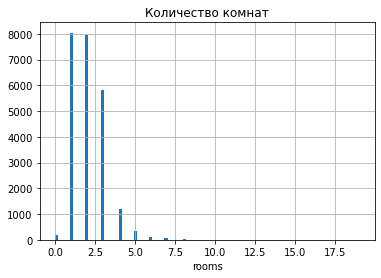

In [9]:
#построим гистограмму распределения кол-ва комнат

data['rooms'].hist(bins=100, range=(0,19))
plt.title('Количество комнат')
plt.xlabel('rooms')
plt.show()

Отрицательных значений нет, зато есть 0 и макс кол-во комнат 19,скорее всего опечатка, крайний пик приходится на 4 комнаты, что кажется вполне правдоподобным,есть какое-то кол-во с 5 комнатами, 0 скорее всего опечатка, доля мала, не будем с ними ничего делать. 

In [10]:
# посмотрим уникальные значения
display(data['first_day_exposition'].value_counts())

2018-02-01T00:00:00    368
2017-11-10T00:00:00    240
2017-10-13T00:00:00    124
2017-09-27T00:00:00    111
2018-03-26T00:00:00     97
                      ... 
2018-05-20T00:00:00      1
2015-05-15T00:00:00      1
2015-01-12T00:00:00      1
2015-12-19T00:00:00      1
2015-07-19T00:00:00      1
Name: first_day_exposition, Length: 1491, dtype: int64

Тип данных int64, поменяем тип на соответствующий для даты и уберем время, так как это не существенно для анализа данных.

In [11]:
# меняем формат и проверяем
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
display(data['first_day_exposition'].head())

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

Замена прошла успешно, тип данных datetime64.

Заполним пропуски в данных балконов на 0 и проверим. Поменяем тип данных, так как балконы могут быть только целым числом.

In [12]:
# заполнение пропусков и изменение типа данных
data['balcony']= data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int')
data['balcony'].isna().sum()

0

Проверили заполнение, пропусков нет.

In [13]:
# проверим уникальные значения и возможные выбросы
display(data['balcony'].value_counts())

0    15277
1     4195
2     3659
5      304
4      183
3       81
Name: balcony, dtype: int64

Пропусков нет, тип данных изменен, явных аномалий нет. Есть и 5, и 3 балкона, их доля мала, поэтому оставим их.

In [14]:
# поменяем тип данных
data['last_price'] = data['last_price'].astype('int')

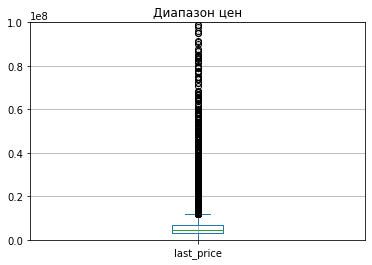

In [15]:
# строим диаграмму размаха
data['last_price'].plot(kind = 'box', ylim=(0, 100000000),grid=True)
plt.title('Диапазон цен')
plt.show()

In [16]:
# изучим данные в `last_price`
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Размах цен очень большой, с большими выбросами более 8 млн, нам лучше от них избавиться.

In [17]:
# удаляем пропуски 
data = data.dropna(subset=['floors_total', 'locality_name'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int32         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  object        
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

In [18]:
# считаем долю пропущенных значений

total_entries = (23699*2)
floors_total = 23613
locality_name = 23650
display(f'Доля пропущенных значений составляет {(total_entries-floors_total-locality_name)/total_entries:.2%}')      

'Доля пропущенных значений составляет 0.28%'

После удаления пропусков в двух столбцах высчитали долю, она очень, к счастью, мала.

In [19]:
# проверяем мин и макс значения
display(data['floors_total'].max())
display(data['floors_total'].min())


60.0

1.0

Аномалий нет в плане отрицательных значений, мин значение 1, все верно, макс 60, достаточно высокий дом, 
посмотрим уникальные значения.

In [20]:
# посмотрим на уникальные значения
display(data['floors_total'].value_counts())

5.0     5775
9.0     3758
16.0    1375
12.0    1361
4.0     1193
10.0    1174
25.0    1075
6.0      910
17.0     833
3.0      667
7.0      589
14.0     553
18.0     505
24.0     462
8.0      388
2.0      381
15.0     365
23.0     349
19.0     339
22.0     286
20.0     271
13.0     229
11.0     202
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
34.0       1
60.0       1
29.0       1
33.0       1
52.0       1
37.0       1
Name: floors_total, dtype: int64

Аномальных значений нет, 0 этажа тоже нет, однако есть по одному объявлению, где и 36 и 60 этажей, такие выбросы этажности могут сильно повлиять на медианную величину, поэтому удалим объявления этажностью больше или равно 28 этажам. 

In [21]:
# поменяем тип данных
data['floors_total'] = data['floors_total'].astype('int')
display(data['floors_total'].head())


0    16
1    11
2     5
3    14
4    14
Name: floors_total, dtype: int32

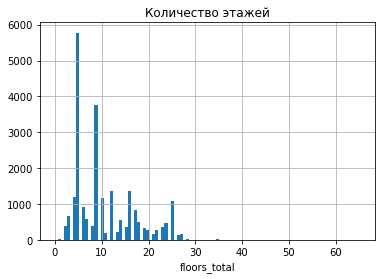

In [22]:
#построим гистограмму по кол-ву этажей в доме
data['floors_total'].hist(bins=100, range=(0,65))

plt.title('Количество этажей')
plt.xlabel('floors_total')
plt.show()

На гистограмме явно видел всплеск у значения 5, затем 9,16, 12 : эти этажности самые распространенные в городе.
Крайний всплеск на значении 25.Этим этажом мы и ограничем нашу выборку и далее заполним пропуски медианным
значениями, которые будут более точными за счет исключения выбросов

In [23]:
# проверим данные 'locality_name' нет ли неявных дубликтов.

display(data['locality_name'].unique())

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

при выводе уникальных названий, выяснилось, что есть вариации на 'поселок' и 'посёлок'. Уберем эту разницу.

In [24]:
# производим замену букв
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'].isna().sum()
data = data.dropna(subset=['locality_name'])
data['locality_name'].isna().sum()

0

In [25]:
# изучим уникальные значения в `locality_name`
display(data['locality_name'].unique())

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

Все названия у нас уникальные. 
Исследуем 'ceiling_height', тип данных нас устраивает, посмотрим, что 
с аномалиями.


In [26]:
# посчитаем уникальные значения
display(data['ceiling_height'].value_counts())

2.50    3515
2.60    1645
2.70    1571
3.00    1108
2.80     988
        ... 
5.00       1
2.20       1
2.34       1
3.93       1
3.59       1
Name: ceiling_height, Length: 183, dtype: int64

In [27]:
# посмотрим на мин и макс значения
display(data['ceiling_height'].min())
display(data['ceiling_height'].max())

# посмотрим на описание данных
data['ceiling_height'].describe()

1.0

100.0

count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Миниамльное значение 1, немного странно, ниже человеческого роста, скорее всего опечатка, есть 27 и 100... 
для высоты потолка это слишком много, есть и NAN, по стандартам у нас высота потолка 2,60 или 3.20. Аномалии могли возникунуть из-за того, что кто-то мог в сантиметрах пытаться вводить или просто вводили цифры, не обращая на верный формат.


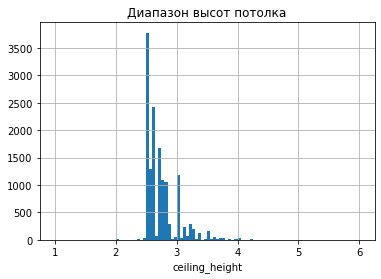

In [28]:
# построим гистограмму
data['ceiling_height'].hist(bins=100, range=(1,6))
plt.title('Диапазон высот потолка')
plt.xlabel('ceiling_height')

plt.show()

На гистограмме явно виден пик на 2.75,2.50 и 3.00. Это стандартные размеры высоты потолков в нашей стране.
Все что меньше или больше - это выбросы, мы возьмем для изучения данные с  макс высотой потолка 3м, а пропуски заполним медианным значением.

In [29]:
# запоним пропуски медианным значением
data.loc[data['ceiling_height'].isna(),'ceiling_height'] = data['ceiling_height'].median()

# проверим не осталось ли пропущенных значений
data['ceiling_height'].isna().sum()

0

In [30]:
# посмотрим на описание данных
data['living_area'].describe()

count    21700.000000
mean        34.454822
std         22.045359
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Жилая площадь мин значение 2 м2, это конечно опечатка, равно как и площадь 409, от которых нам придется избаввиться,в 75% объявлениях жилая площадь 42.3 м2.

In [31]:
#проверим уникальные значения
data['living_area'].value_counts()

18.00     882
17.00     673
30.00     598
16.00     483
20.00     479
         ... 
82.10       1
68.48       1
31.12       1
160.10      1
42.55       1
Name: living_area, Length: 1769, dtype: int64

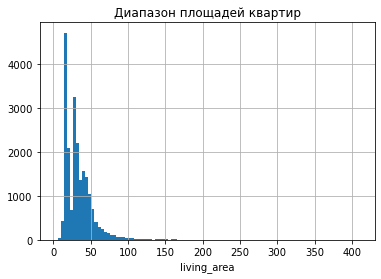

In [32]:
#построим гисторграмму
data['living_area'].hist(bins=100, range=(2,410))
plt.title('Диапазон площадей квартир')
plt.xlabel ('living_area')
plt.show()

На гистограмме видны всплески на 22,30, 40. Основная масса показателей находится в диапазон от 18 и до 50. 
При этом есть редкие показатели до 150 кв м. и редкие выбросы до 250 и выше кв.м. 
Жилые площади 150 кв.м ,конечно, существуют,но их мало, разброс  да и при строительстве домов каждая квартира получается индивидуальна. 
Для начала мы создадми срез по высоте потолка, так как есть все-таки стандарты и по кол-ву комнат, проверим наши данные и примем решение, по каким параметрам у нас еще не хватает данных и решим, что с ними делать.

In [33]:
#изучим данные по площади кухни
data['kitchen_area'].describe()

count    21343.000000
mean        10.560994
std          5.900630
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Минимальное значение явно описка, так же как и максимальное, среднее значение 10.56 кажется вполне правильным

In [34]:
# посмотрим на уникальные значения в `kitchen_area`
data['kitchen_area'].value_counts()

6.00     1298
10.00    1259
8.00     1108
9.00     1099
7.00     1062
         ... 
53.10       1
12.56       1
11.84       1
13.17       1
13.83       1
Name: kitchen_area, Length: 963, dtype: int64

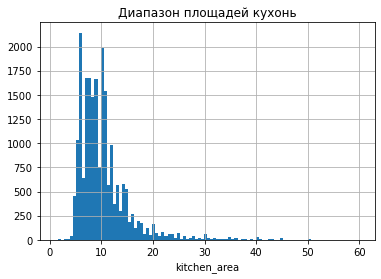

In [35]:
# построим гистограмму

data['kitchen_area'].hist(bins=100, range=(1,60))
plt.title('Диапазон площадей кухонь')
plt.xlabel('kitchen_area')
plt.show()

На гистограмме видны всплески на 7, затем 10 кв м, но при этом показатели в основном находятся в диапазоне от 5 до 15 кв.м, что собственно кажется вполне логичным.



In [36]:
# в новой переменной сохранила срез данных, убрав выбросы
kitchen_new=data[data['kitchen_area']<20]
kitchen_new ['kitchen_area'].describe()


count    20192.000000
mean         9.520682
std          3.155516
min          1.300000
25%          7.000000
50%          9.000000
75%         11.100000
max         19.940000
Name: kitchen_area, dtype: float64

Средняя изменилась с 10.56 до 9.52. Разница не большая, оставим эти данные.
Изучив данные, установив средние, мин и максимальные значения, готовы сформировать срез данных по утсраивающим нас условиям, убрав выбросы и опечатки, насколько это возможно.

In [37]:
# добавим колонку с ценой за 1 кв.м, поменяем тип данных на int.

data['price_for_1m'] = (data['last_price']/data['total_area'])
data['price_for_1m'] = data['price_for_1m'].astype(int)
display(data['price_for_1m'].head())

0    120370
1     82920
2     92785
3    408176
4    100000
Name: price_for_1m, dtype: int32

In [38]:
# посмотрим на описание данных
data['price_for_1m'].describe()

count    2.356500e+04
mean     9.940539e+04
std      5.038944e+04
min      1.110000e+02
25%      7.656600e+04
50%      9.500000e+04
75%      1.142130e+05
max      1.907500e+06
Name: price_for_1m, dtype: float64

In [39]:
#создали новый срез по нашим условиям

data_sorted= data[(data['floors_total'] <= 40) & (data['ceiling_height'] <= 4) & (data ['rooms']<= 9) & (data['price_for_1m'] <= 150000)]
display(data_sorted['ceiling_height'].max())
display(data_sorted['floors_total'].max())
display(data_sorted['rooms'].max())
display(data_sorted['price_for_1m'].max())        


4.0

37

9

150000

In [40]:
# выведем общую информацию по датасету
data_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21889 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21889 non-null  int64         
 1   last_price            21889 non-null  int32         
 2   total_area            21889 non-null  float64       
 3   first_day_exposition  21889 non-null  datetime64[ns]
 4   rooms                 21889 non-null  int64         
 5   ceiling_height        21889 non-null  float64       
 6   floors_total          21889 non-null  int32         
 7   living_area           20202 non-null  float64       
 8   floor                 21889 non-null  int64         
 9   is_apartment          21889 non-null  object        
 10  studio                21889 non-null  bool          
 11  open_plan             21889 non-null  bool          
 12  kitchen_area          19855 non-null  float64       
 13  balcony         

In [41]:
# проверяем новый дата фрейм 
display(data_sorted.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21889 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21889 non-null  int64         
 1   last_price            21889 non-null  int32         
 2   total_area            21889 non-null  float64       
 3   first_day_exposition  21889 non-null  datetime64[ns]
 4   rooms                 21889 non-null  int64         
 5   ceiling_height        21889 non-null  float64       
 6   floors_total          21889 non-null  int32         
 7   living_area           20202 non-null  float64       
 8   floor                 21889 non-null  int64         
 9   is_apartment          21889 non-null  object        
 10  studio                21889 non-null  bool          
 11  open_plan             21889 non-null  bool          
 12  kitchen_area          19855 non-null  float64       
 13  balcony         

None

In [42]:
# проверим на пропущенные значения

data_sorted.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1687
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2034
balcony                     0
locality_name               0
airports_nearest         5473
cityCenters_nearest      5462
parks_around3000         5461
parks_nearest           14939
ponds_around3000         5461
ponds_nearest           13995
days_exposition          2752
price_for_1m                0
dtype: int64

После удаления пустых строк, выбросов мы получили определенный срез данных, при проверке на пустые значения, мы видим, что во всех картографических параметрах есть пропуски,а так же в площадях.

In [43]:
# проверим данные по паркам

parks= data_sorted[['parks_around3000','parks_nearest']]
display(parks.head())

,parks_around3000,parks_nearest
0,1.0,482.0
1,0.0,NaN
2,1.0,90.0
4,2.0,112.0
5,NaN,NaN


In [44]:
# изучим данные по паркам
data_sorted['parks_around3000'].describe()


count    16428.000000
mean         0.570611
std          0.774789
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64

In [45]:
# посмотрим на уникальные значения
display(data_sorted['parks_around3000'].value_counts())

0.0    9482
1.0    5008
2.0    1448
3.0     490
Name: parks_around3000, dtype: int64

Так как показатель ограничен кол-вом километров, то показатели однородны, большая доля с 0 значением, значит парка нет, пропуски заполним медианным значением. Посмотрим, как данные распределяются в следующем показатели про парки.

In [46]:
# изучим данные по паркам
data_sorted['parks_nearest'].describe()

count    6950.000000
mean      484.677266
std       323.881412
min         1.000000
25%       288.000000
50%       453.000000
75%       610.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Здесь разброс в данных очень большой, медианное значение будет сильно усреднено, тем не менее заполним ими.

In [47]:
# посмотрим на уникальные значения

display(data_sorted['parks_nearest'].value_counts())

441.0     55
456.0     31
392.0     31
458.0     28
447.0     25
          ..
868.0      1
858.0      1
133.0      1
828.0      1
2984.0     1
Name: parks_nearest, Length: 971, dtype: int64

In [48]:
#заполним пропуски медианными значениями

data_sorted.loc[data_sorted['kitchen_area'].isna(),'kitchen_area'] = data_sorted ['kitchen_area'].median()
data_sorted.loc[data_sorted['living_area'].isna(),'living_area'] = data_sorted['living_area'].median()
data_sorted.loc[data_sorted['airports_nearest'].isna(),'airports_nearest'] = data_sorted ['airports_nearest'].median()
data_sorted.loc[data_sorted['cityCenters_nearest'].isna(),'cityCenters_nearest'] =data_sorted ['cityCenters_nearest'].median()
data_sorted.loc[data_sorted['parks_around3000'].isna(),'parks_around3000'] = data_sorted ['parks_around3000'].median()
data_sorted.loc[data_sorted['ponds_nearest'].isna(),'ponds_nearest'] = data_sorted ['ponds_nearest'].median()
data_sorted.loc[data['parks_nearest'].isna(),'parks_nearest'] =data_sorted ['parks_nearest'].median()
data_sorted.loc[data_sorted['ponds_around3000'].isna(),'ponds_around3000'] = data_sorted ['ponds_around3000'].median()

# посчитаем пропуски
display (data_sorted['kitchen_area'].isna().sum())
display (data_sorted['living_area'].isna().sum()) 


0

0

Заполнили пропуски медианными значениями, проверили наличие пропусков в 2х перпых параметрах, все сработало.


In [49]:
# создадим новый датасет с данными по 'first_day_exposition' и 'days_exposition'
daysexposition_study = data_sorted[['first_day_exposition', 'days_exposition']]
                           
display(daysexposition_study.head())                                                          

,first_day_exposition,days_exposition
0,2019-03-07,NaN
1,2018-12-04,81.0
2,2015-08-20,558.0
4,2018-06-19,121.0
5,2018-09-10,55.0


Дата размещения есть везде, нет даты снятия объявления, у части объявлений посчитано кол-во дней показов, а других нет и нет пропусков, на аномалию или сбой не похоже, так как, там ,где нет численного значения, имеется значение Nan, из чего делаем предположение, что объявление еще не снято с показа.


In [50]:
# окончательно проверим наши данные
data_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21889 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21889 non-null  int64         
 1   last_price            21889 non-null  int32         
 2   total_area            21889 non-null  float64       
 3   first_day_exposition  21889 non-null  datetime64[ns]
 4   rooms                 21889 non-null  int64         
 5   ceiling_height        21889 non-null  float64       
 6   floors_total          21889 non-null  int32         
 7   living_area           21889 non-null  float64       
 8   floor                 21889 non-null  int64         
 9   is_apartment          21889 non-null  object        
 10  studio                21889 non-null  bool          
 11  open_plan             21889 non-null  bool          
 12  kitchen_area          21889 non-null  float64       
 13  balcony         

###  Вывод

Мы изучили данные в каждом столбце; где было необходимо, поменяли тип данных, изучили выбросы и избавились от них, сделали срез данных для анализа по отобранным критериям. Данные готовы для изучения взаимосвязей. Кол-во строк сократилось почти в двое, зато мы получили данные без ошибок.

## Расчёты и добавление результатов в таблицу

In [51]:
# добавляем столбцы с днем недели, числом и годом.

data_sorted['day_of_week'] =pd.DatetimeIndex(data_sorted['first_day_exposition']).weekday
data_sorted['month'] =pd.DatetimeIndex(data_sorted['first_day_exposition']).month
data_sorted['year'] =pd.DatetimeIndex(data_sorted['first_day_exposition']).year
display(data_sorted.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_1m,day_of_week,month,year
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,18603.0,0.0,453.0,0.0,517.0,81.0,82920,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785,3,8,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000,1,6,2018
5,10,2890000,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,13538.0,0.0,453.0,0.0,517.0,55.0,95065,0,9,2018


Создали 3 новых столбца с временными параметрами публикации объявлений, в будущем изучим взаимосвязь.

In [52]:
# напишем функцию для выделения первого и последнего этажей 
def floor_type(row):
    if row ['floor'] == 1:
         return 'первый'
    if row['floor'] == row['floors_total']:
         return 'последний'
    return 'другой'
data_sorted['floor_type']=data_sorted.apply(floor_type, axis = 1)    

In [53]:
# проверим работу функции

display(data_sorted [['floor','floors_total', 'floor_type']].head(10))

,floor,floors_total,floor_type
0,8,16,другой
1,1,11,первый
2,4,5,другой
4,13,14,другой
5,5,12,другой
6,6,26,другой
7,22,24,другой
8,26,27,другой
9,7,9,другой
10,3,12,другой


Функция работает верно.

In [54]:
# высчитали соотношение жилой к общей площади
data_sorted['living_total_ratio']= data_sorted['living_area']/data_sorted['total_area']
display(data_sorted['living_total_ratio'].head())

0    0.472222
1    0.460396
2    0.612500
4    0.320000
5    0.473684
Name: living_total_ratio, dtype: float64

In [55]:
# считаем соотношений площади кухни к общей площади

data_sorted['kitchen_total_ratio']= data_sorted['kitchen_area']/data_sorted['total_area']
display(data_sorted['kitchen_total_ratio'].head())

0    0.231481
1    0.272277
2    0.148214
4    0.410000
5    0.299342
Name: kitchen_total_ratio, dtype: float64

## Исследовательский анализ данных

In [56]:
# делаем срез данных по площади кв и стоимости 1 кв.м

area_pivot= data_sorted.pivot_table(index = ['price_for_1m'], values = ('total_area', 'living_area', 'kitchen_area'))
display(area_pivot)

,kitchen_area,living_area,total_area
price_for_1m,,,
111,40.5000,32.0000,109.000000
7962,9.0000,30.0000,54.000000
9615,8.0000,31.0000,52.000000
10185,7.5000,40.0000,54.000000
10368,5.5000,30.3000,43.400000
...,...,...,...
149819,21.4000,20.4000,55.400000
149837,12.5000,33.7000,61.400000
149935,22.5000,37.0000,77.000000


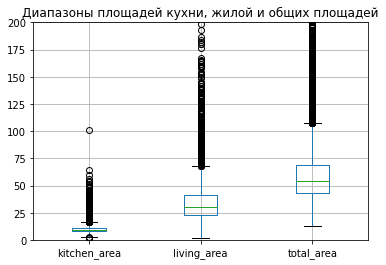

In [57]:
# строим ящик с усами 
area_pivot.boxplot()
plt.ylim(0,200)
plt.title('Диапазоны площадей кухни, жилой и общих площадей')
plt.show()

По диаграмме видно, что площадь кухонь намного меньше, чам жилой и общей, медианное значение в районе 9 кв.м, макс до 40 кв.м, жилая площадь с медианным значением 30 кв.м., мин общая площадь от 20 кв.м, медианной значение 50, и есть редкие выбросы до 190 кв.м.

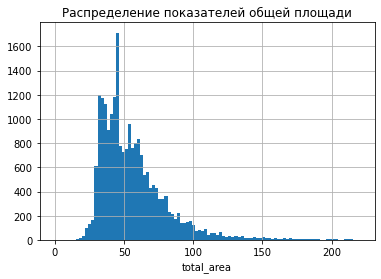

In [58]:
# строим гистограмму общей площади квартир
data_sorted['total_area'].hist(bins=100, range=(0,220))
plt.title('Распределение показателей общей площади')
plt.xlabel('total_area')
plt.show()

Пример ненормального распределения, сначала виден рост, затем на 35 кв м уменьшение и затем подъем к новому пиковому значению на 48 кв.м. Основная масса данных сосредоточена в диапозоне от 30 до 70 кв.м, что очень похоже на реальность.

In [59]:
# изучим данные по last_price
data_sorted['last_price'].describe()


count    2.188900e+04
mean     5.263574e+06
std      3.365397e+06
min      1.219000e+04
25%      3.350000e+06
50%      4.490000e+06
75%      6.200000e+06
max      5.100000e+07
Name: last_price, dtype: float64

Минимальная стоимсоть 1 млн. 200, макс 8 млн.

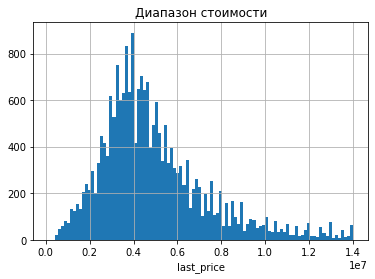

In [60]:
# построим гистограмму по цене
data_sorted['last_price'].hist(bins=100, range=(121900,14000000))
plt.title('Диапазон стоимости')
plt.xlabel('last_price')
plt.show()

Это ненормальное распределение с несколькими пиками,макс. частая стоимость около 3.7 и  3.9 млн за квартиру, правая сторона чуть длиннее,что тоже логично, так как аномалий нет, а цена нулевой бытьне может, а вот высокая стоимость вполне возможна за большую квартиру, в историческом центре города и возможно с шикарным ремонтом.

In [61]:
# изучим данные по кол-ву комнат
data_sorted['rooms'].describe()

count    21889.000000
mean         2.033944
std          1.023120
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          9.000000
Name: rooms, dtype: float64

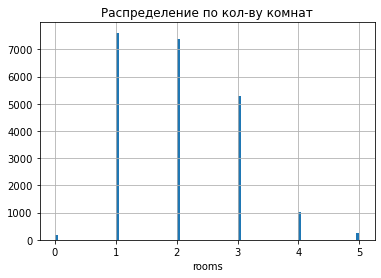

In [62]:
# построим гистограмму  по кол-ву  комнат
data_sorted['rooms'].hist(bins=100, range=(0,5))
plt.title('Распределение по кол-ву комнат')
plt.xlabel('rooms')
plt.show()

Какое-то единичное нулевое значение, но это опечатка, разброс не большой и четкий, так как 
комнаты в квартире вполне исчисляемый параметр, самые ходовые квартиры с 1 и 2 комнатами, 
их больше строят и чаще продают/покупают.

In [63]:
# изучим данные в `ceiling_height`
data_sorted['ceiling_height'].describe()

count    21889.000000
mean         2.678726
std          0.188538
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

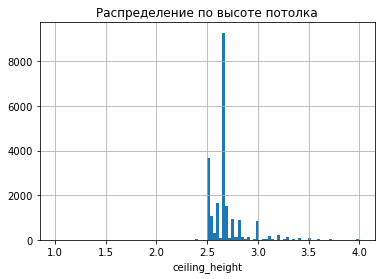

In [64]:
# построим гистограмму по высоте потолка
data_sorted['ceiling_height'].hist(bins=100, range=(1,4))
plt.title('Распределение по высоте потолка')
plt.xlabel('ceiling_height')
plt.show()

Несмотря на то, что есть стандарты строительства, высота потолков в объявлениях была разной, самое пиковое значение 2.60, хотя иногда отсутствовала вообще,это возможно по причине опечаток или простого незнания точного значения. Пропуски мы заполнили медианным значением.

In [65]:
# изучим данные по сроку размещения объявления
data_sorted['days_exposition'].describe()

count    19137.000000
mean       176.985682
std        215.552087
min          1.000000
25%         44.000000
50%         93.000000
75%        225.000000
max       1580.000000
Name: days_exposition, dtype: float64

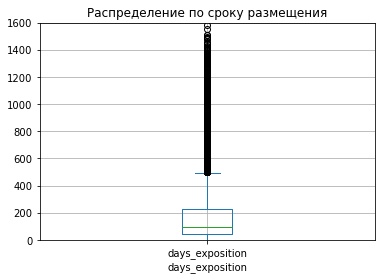

In [66]:
# строим диаграмму размаха по срокам размещения
data_sorted['days_exposition'].plot(kind = 'box', ylim=(0, 1600),grid=True)
plt.title('Распределение по сроку размещения')
plt.xlabel('days_exposition')
plt.show()

По данным графика мы видим, что медианное значение не доходит до 200 дней, примерно 150 дней, а это 5 мес в среднем, нижний ус коротки и без выбросов, верхний же ус намного больше и с выбросами.Есть объявления,которые очень долгое время не закрываются.

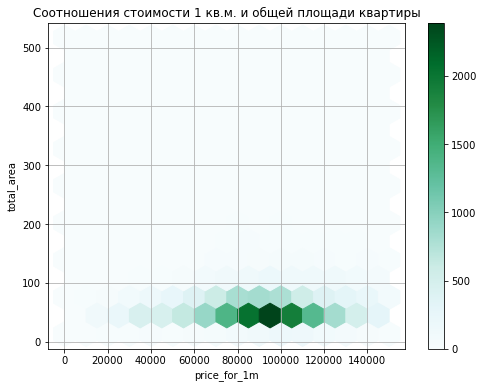

In [67]:
# строим диаграмму по цене за 1 кв.м. и общей площадью
data_sorted.plot(x='price_for_1m', y = 'total_area', kind='hexbin', gridsize=15, figsize=(8,6), sharex=False, grid=True)
plt.title('Соотношения стоимости 1 кв.м. и общей площади квартиры')

plt.show()

In [68]:
# высчитываем коррелцию между ценой за 1 кв.м. и общей площадью квартир
display(data_sorted['price_for_1m'].corr(data_sorted['total_area']))

0.046940638749386955

По гистограмме рассеиния видно скопление в районе 50 кв.м по стоимости 100 000 руб. за кв.м. Процент корреляции близок к 0, а именно 0,19, между ценой за 1 кв.м и общей площадью нет выраженной линейной связи.

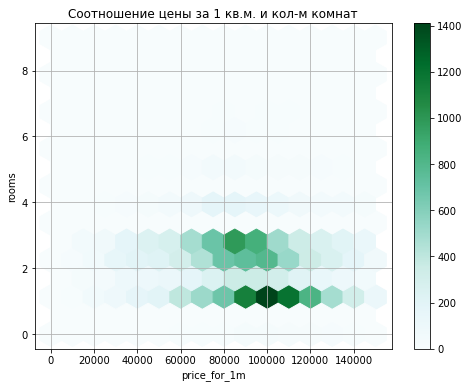

In [69]:
# строим диаграмму по цене за 1 кв.м. и кол-м комнат
data_sorted.plot(x='price_for_1m', y = 'rooms', kind='hexbin', gridsize=15, figsize=(8,6), sharex=False, grid=True)
plt.title('Соотношение цены за 1 кв.м. и кол-м комнат')
plt.show()

In [70]:
# высчитываем коррелцию между ценой за 1 кв.м. и кол-м комнат
display(data_sorted['price_for_1m'].corr(data_sorted['rooms']))

-0.11982803045070663

Стоимость за 1 кв м в 1 комн квартирах чаще встречается дороже,чем в 2 и 3 комн квартирах, превышает 1500000, а в 2 комн не доходит до 1500000. Корреляция отрицательная, то есть с увелечением числа комнат, стоиомтсь за 1 кв понижается.

In [71]:
# иучаем данные по удаленности от центра города
data_sorted['cityCenters_nearest'].describe()

count    21889.000000
mean     14518.024350
std       7460.665063
min        215.000000
25%      11646.000000
50%      13538.000000
75%      15509.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

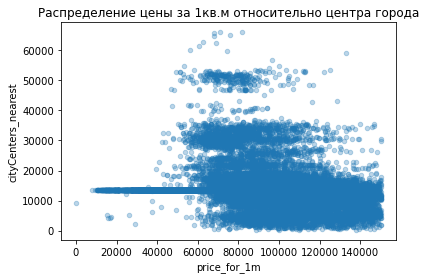

In [72]:
# строим гистограмму по удаленности от центра города
data_sorted.plot(x='price_for_1m', y = 'cityCenters_nearest', kind='scatter', alpha=0.3)
plt.title('Распределение цены за 1кв.м относительно центра города')
plt.show()

In [73]:
# высчитываем корреляцию между ценой за 1 кв.м и расположением относительно центра города
display(data_sorted['price_for_1m'].corr(data_sorted['cityCenters_nearest']))

-0.20174585613303822

Чем меньше расстояние до центра, тем больше разброс цен, есть выбросы более 300000 руб, в основном это цена в диапазоне от 900 000 до 150000, чем больше расстояние, тем понижается левая грань иногда ничанается с 30000 за кв м, а напрмеир на расстоянии 50 км ценав среднем не доходит до 100000 руб. 

In [74]:
# проверим уникальные значения
data_sorted['day_of_week'].value_counts()

3    3966
1    3879
4    3698
2    3656
0    3325
5    1790
6    1575
Name: day_of_week, dtype: int64

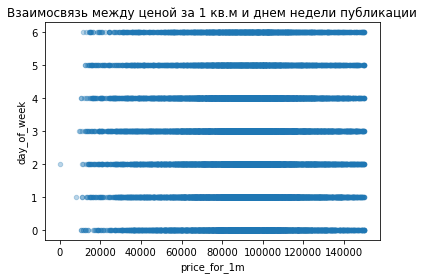

In [75]:
#построим диаграмму
data_sorted.plot(x='price_for_1m', y = 'day_of_week', kind='scatter', alpha=0.3)
plt.title('Взаимосвязь между ценой за 1 кв.м и днем недели публикации')
plt.show()

In [76]:
# высчитываем корреляцию
display(data_sorted['price_for_1m'].corr(data_sorted['day_of_week']))

-0.012034458936063358

Как и следовало ожидать , день недели на стоимость никак не влияет. От дня недели скорее зависит покупка, но это тоже еще стоит доказать.

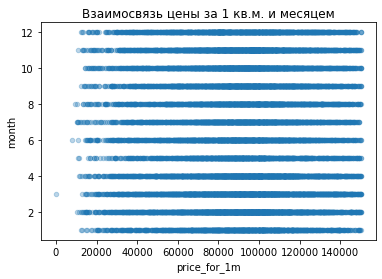

In [77]:
# строим диаграмму
data_sorted.plot(x='price_for_1m', y = 'month', kind='scatter', alpha=0.3)
plt.title('Взаимосвязь цены за 1 кв.м. и месяцем')
plt.show()

In [78]:
# высчитываем корреляцию
display(data_sorted['price_for_1m'].corr(data_sorted['month']))

0.0011521746122748946

Зависимость цены за кв м от месяца публикации никак не зависит, корреляция -0.008 очень близка к 0, поэтому линейной зависиомсти нет.

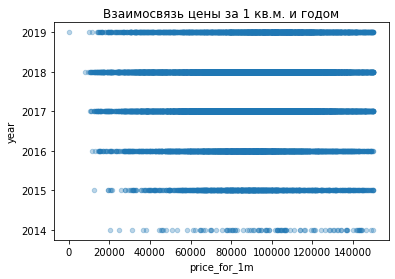

In [79]:
# строим диаграмму
data_sorted.plot(x='price_for_1m', y = 'year', kind='scatter', alpha=0.3)
plt.title('Взаимосвязь цены за 1 кв.м. и годом')
plt.show()


In [80]:
# высчитываем корреляцию
display(data_sorted['price_for_1m'].corr(data_sorted['year']))

0.05273978796489151

Зависимость цены зы 1 кв.м. от года публикации имеет малую корреляцию 0.06, в 2015 году основной диапазон цен был от 3 до 6 млн, в 2019 от 2 до 8 и больше и в 2019 году уменьшилось число дорогих предложений, в 2018 году они превышали 170т руб. а в 2019 чуть больше 150 т руб за 1 кв.м.

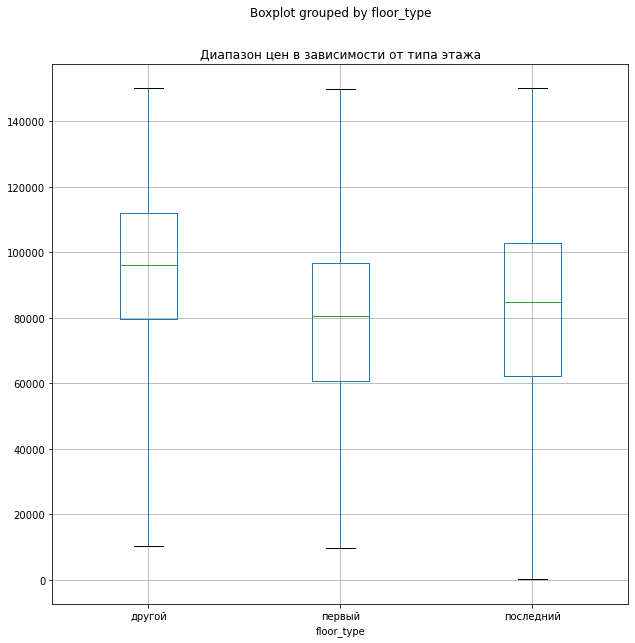

In [81]:
# строим диаграммы размаха
data_sorted.boxplot('price_for_1m', by='floor_type',figsize=(10,10),whis= 20)
plt.title('Диапазон цен в зависимости от типа этажа')
plt.show()

На диаграмме видно, что медианное значение цены у первого по последнего этажа совпадает на уровне 60т.руб,
у других этажей чуть выше 80 т.руб, не очень любыт первый и последний этажы. Разбег маскимальной цены для первого этажа совсем низкий до 180 т. руб,
на последних этажах превышает даже 300 т.руб, это можно обьяснить тем, что иногда на последних этажах размещают "Элитное жилье", поэтому стоимость так варьируется


In [82]:
# создаем новый датасет
data_sorted_final = data_sorted[['last_price','floor','total_area','rooms','cityCenters_nearest' ]]
display(data_sorted_final.head())

,last_price,floor,total_area,rooms,cityCenters_nearest
0,13000000,8,108.0,3,16028.0
1,3350000,1,40.4,1,18603.0
2,5196000,4,56.0,2,13933.0
4,10000000,13,100.0,2,8098.0
5,2890000,5,30.4,1,13538.0


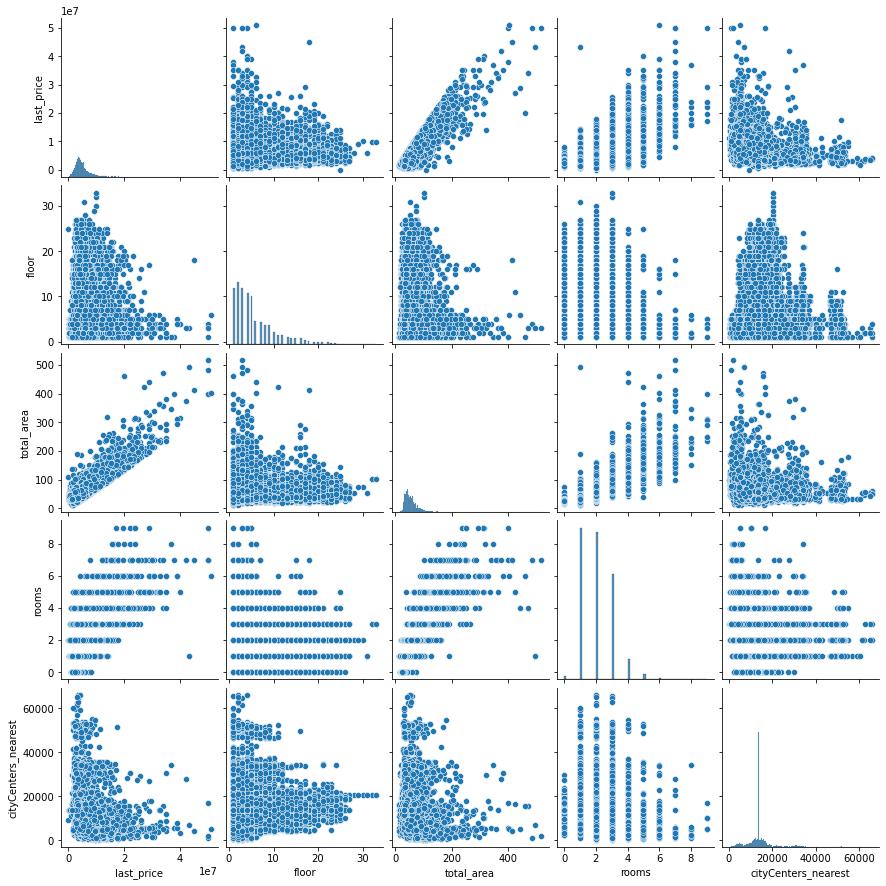

In [83]:
# строим диаграмму рассеяния
sns.pairplot(data_sorted_final)
plt.show()

###  Вывод

Из всех выше изученных параметров на стоимсть 1 кв м влияет отдаленность от центра, этажность,где медианное значение на 'других этажах' выше и тысяч на 200,чем на 1 и последнем.
Общая стоимость жилья так же на прямую зависит от:
* общей площади помещения и  слегка от кол-ва комнат,то есть с увеличенем кол-ва комнат появляются случаи с более дорогой стоимостью (1 колонка второй снизу rooms-last_price,
* чем квартира дальше от центра, тем меньше размах цен,и наоброт, чем ближе к центру, тем больше размах в сторону увелеения стоимости(1 колонка 1я снизу)
* на нижних этажах больший разброс цен, чем на верхних (1 колонка 4 снизу).

In [84]:
# отсортируем данные по названию и высчитаем среднюю стомиость за 1 кв метр по конкретному 
# населенному пункту
popular_city = data_sorted.pivot_table(index = 'locality_name', values = 'price_for_1m', aggfunc=['count', 'mean'])
popular_city.columns = ['count', 'mean']
popular_city = popular_city.sort_values('count', ascending = False).head(10)
display(popular_city.head(10))

,count,mean
locality_name,,
Санкт-Петербург,14027,103787.402795
поселок Мурино,550,85603.185455
поселок Шушары,439,78550.883827
Всеволожск,396,67161.123737
Пушкин,351,99830.472934
Колпино,338,75424.150888
поселок Парголово,327,90175.489297
Гатчина,306,68757.225490
деревня Кудрово,299,92473.086957


In [85]:
# выделили данные для спб
data_spb = data_sorted.query('locality_name == "Санкт-Петербург"')
display(data_spb.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_1m,day_of_week,month,year,floor_type,living_total_ratio,kitchen_total_ratio
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2.0,755.0,NaN,120370,3,3,2019,другой,0.472222,0.231481
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,2.0,574.0,558.0,92785,3,8,2015,другой,0.612500,0.148214
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1.0,48.0,121.0,100000,1,6,2018,другой,0.320000,0.410000
7,5,7915000,71.6,2019-04-18,2,2.65,24,30.0,22,False,...,0.0,517.0,NaN,110544,3,4,2019,другой,0.418994,0.263966
9,18,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,False,...,0.0,517.0,289.0,88524,6,2,2017,другой,0.714754,0.106557
10,5,5050000,39.6,2017-11-16,1,2.67,12,20.3,3,False,...,2.0,553.0,137.0,127525,3,11,2017,другой,0.512626,0.214646
15,16,4650000,39.0,2017-11-18,1,2.65,14,20.5,5,False,...,1.0,296.0,19.0,119230,5,11,2017,другой,0.525641,0.194872
16,11,6700000,82.0,2017-11-23,3,3.05,5,55.6,1,False,...,0.0,517.0,397.0,81707,3,11,2017,первый,0.678049,0.109756
17,6,4180000,36.0,2016-09-09,1,2.65,17,16.5,7,False,...,1.0,859.0,571.0,116111,4,9,2016,другой,0.458333,0.305556
18,8,3250000,31.0,2017-01-27,1,2.50,5,19.4,2,False,...,0.0,517.0,168.0,104838,4,1,2017,другой,0.625806,0.180645


In [86]:
# изменили тип данных
data_spb['cityCenters_nearest'] = data_spb['cityCenters_nearest'].astype('int')
data_spb[['cityCenters_nearest']].head()

,cityCenters_nearest
0,16028
2,13933
4,8098
7,11634
9,15008


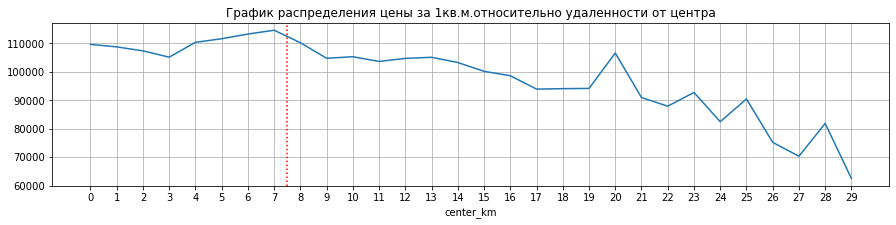

In [87]:
# построили график удаленности от центра
data_spb['center_km'] = data_spb['cityCenters_nearest']//1000
report = (data_spb.query('locality_name == "Санкт-Петербург"').groupby('center_km').agg({'price_for_1m':'mean'})
          .rename(columns = {'price_for_1m': 'Средняя цена м2'}))
report['Средняя цена м2'].plot (grid=True, figsize = (15,3))
plt.axvline(x = 7.5, color = 'red', linestyle = ':')
plt.xticks(report.index.values, report.index.values)
plt.title('График распределения цены за 1кв.м.относительно удаленности от центра')
plt.show()

Построили график зависимости финальной стоимости помещения в зависимости от местоположения.

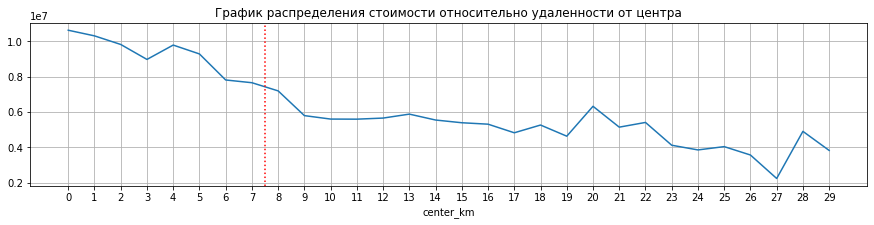

In [88]:
# построили график удаленности от центра
data_spb['center_km'] = data_spb['cityCenters_nearest']//1000
report = (data_spb.query('locality_name == "Санкт-Петербург"').groupby('center_km').agg({'last_price':'mean'})
          .rename(columns = {'last_price': 'Стоимость'}))
report['Стоимость'].plot (grid=True, figsize = (15,3))
plt.axvline(x = 7.5, color = 'red', linestyle = ':')
plt.xticks(report.index.values, report.index.values)
plt.title('График распределения стоимости относительно удаленности от центра')
plt.show()

In [89]:
# изучим данные 
data_spb['center_km'].describe()


count    14027.000000
mean        11.607614
std          4.641046
min          0.000000
25%          9.000000
50%         12.000000
75%         15.000000
max         29.000000
Name: center_km, dtype: float64

In [90]:
# написали ф-ию по распределению зон от центра
def distance_area(center_km):
    if center_km<= 7:
        return 1
    if center_km <=14:
        return 2
    return 3

In [91]:
#проверили работу функции
display(distance_area(7))

1

In [92]:
#проверили данные по столбцам расстояния и зоны
data_spb['distance_area'] = data_spb['center_km'].apply(distance_area)
display(data_spb[['distance_area','center_km']].head(10))

,distance_area,center_km
0,3,16
2,2,13
4,2,8
7,2,11
9,3,15
10,2,13
15,2,14
16,2,10
17,2,14
18,2,10


In [93]:
# сделаем срез
data_spb_center = data_spb.query('distance_area == 1')
display(data_spb_center.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_for_1m,day_of_week,month,year,floor_type,living_total_ratio,kitchen_total_ratio,center_km,distance_area
24,8,6500000,97.2,2015-10-31,2,2.65,3,46.5,1,False,...,265.0,66872,5,10,2015,первый,0.478395,0.201646,2,1
35,6,15500000,149.0,2017-06-26,5,2.65,5,104.0,4,False,...,644.0,104026,0,6,2017,другой,0.697987,0.114094,3,1
52,20,11795000,136.0,2017-09-22,6,3.00,2,94.0,2,False,...,NaN,86727,4,9,2017,последний,0.691176,0.080882,6,1
61,18,7990000,74.0,2017-08-24,2,2.65,4,43.0,4,False,...,609.0,107972,3,8,2017,последний,0.581081,0.270270,4,1
94,3,3500000,29.5,2019-04-26,1,2.50,5,15.6,2,False,...,4.0,118644,4,4,2019,другой,0.528814,0.186441,7,1
99,32,9600000,90.0,2017-09-26,4,2.65,5,67.0,2,False,...,104.0,106666,1,9,2017,другой,0.744444,0.088889,2,1
106,9,10500000,124.1,2017-05-25,5,3.20,4,79.4,3,False,...,6.0,84609,3,5,2017,другой,0.639807,0.161160,5,1
111,4,4590000,40.0,2017-05-29,1,2.65,6,18.0,1,False,...,31.0,114750,0,5,2017,первый,0.450000,0.250000,6,1
136,16,6500000,51.8,2018-08-01,2,3.45,6,25.6,2,False,...,163.0,125482,2,8,2018,другой,0.494208,0.140927,3,1
138,8,4800000,40.0,2017-11-18,2,2.65,3,29.0,2,False,...,80.0,120000,5,11,2017,другой,0.725000,0.150000,2,1


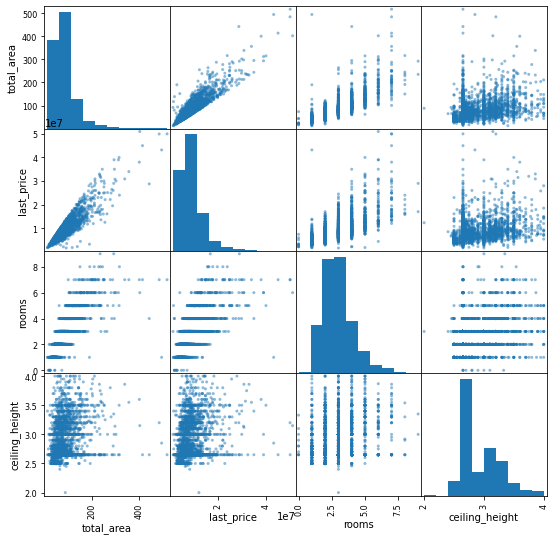

In [94]:
# построим диаграмму
pd.plotting.scatter_matrix(data_spb_center[['total_area', 'last_price', 'rooms','ceiling_height']], figsize=(9,9))
plt.show()

* По диагонали с левой ячейки это обычная гистограмма распределния по общ. площади. Видно, что больше всего квартир с пл. 50кв.м.
* Чаще квартиры выставлются по цене 6 млн. руб.
* Больше всего продается 2 комн. кв.
* С увелечением кол-ва комнат растет минимальная цена.
* Высота потолков в большинстве квартир 2.7м
* С ростом площади растет и цена ( верхн. ряд второе слева)
* Чем больше комнат, тем больше мин. площадь, верхн порог тоже растет,  а так же виден одиночный выброс по площади для 1 комн. квартиры(верхн. ряд третье слева). Это может быть помещение в стиле "лофт" большое по площади, но как моноспэйс.
* Общая площать и высота потолков не имеют зависимости, так же как кол-во комнаты и высота потолков


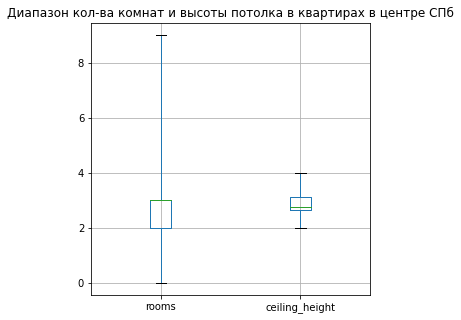

In [95]:
# строим  диаграмму размаха
data_spb_center.boxplot(['rooms','ceiling_height'],figsize=(5,5),whis= 20)
plt.title('Диапазон кол-ва комнат и высоты потолка в квартирах в центре СПб')
plt.show()

Построив коробку с усами по 'rooms','ceiling_height' видно, что медианное значение комнат в квартирах - 2 в центральной части Санкт_Петербурга, есть квартира с 0 комнат - это возможно студии, макимальное кол-во комнат 5. Высота потолка без выброса, макс. значение 3м,медианное 2.7

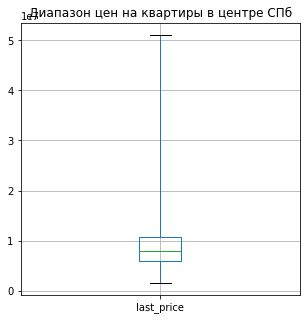

In [96]:
# строим  диаграмму размаха
data_spb_center.boxplot(['last_price'],figsize=(5,5),whis= 6000000)
plt.title('Диапазон цен на квартиры в центре СПб')
plt.show()

В центре Санкт_Петербурга макс. цена доходит до 8 млн. руб, медианное значение  6 млн, самою дешевую недвижимость можно найти за 1.5 млн.руб.

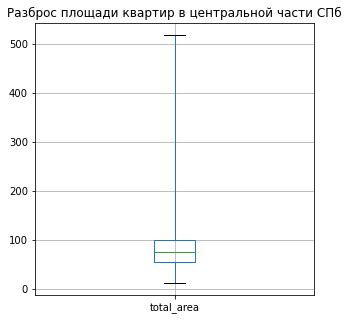

In [97]:
# строим  диаграмму размаха 
data_spb_center.boxplot('total_area', figsize=(5,5), whis = 100)
plt.title('Разброс площади квартир в центральной части СПб')
plt.show()


Разброс площади в центральной части Санкт_Петербурга от 20 кв.м до 195 кв.м, наиболее часто продаются квартиры с площадью 50 кв.м.

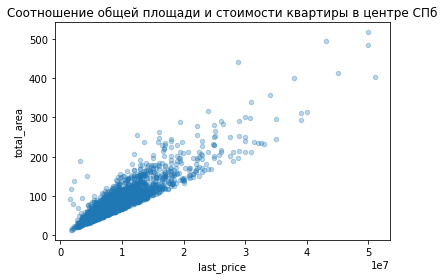

In [98]:
# построим диаграммы рассеяния для пар параметров
data_spb_center.plot(x='last_price', y='total_area', kind='scatter', alpha=0.3 )
plt.title('Соотношение общей площади и стоимости квартиры в центре СПб')
plt.show()

С увелечением площади квартиры  в Петербурге мы видим плавный рост  минимальной стоимости, причем чем больше стоимость, тем шире диапазон площади от 45 кв.м до 115, но есть несколько крайних значений 90 или 185 кв.м по низкой стоимости, это может быть жилье в несданном доме, Нельзя выделить какое-то одно единствен

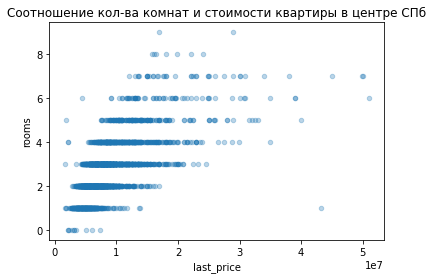

In [99]:
# построим диаграммы рассеяния для пар параметров
data_spb_center.plot(x='last_price', y='rooms', kind='scatter', alpha=0.3 )
plt.title('Соотношение кол-ва комнат и стоимости квартиры в центре СПб')
plt.show()

На графике видно, что чем больше кол-ва комнат, тем выше мин цена, стартует сразу от 6 млн, тогда как стоимость 1 комн квартиры начинается 1900000,хотя верхний диапазон достаточен высок , то есть за 6 млн можно купить 1 или 2 комн квартиру.

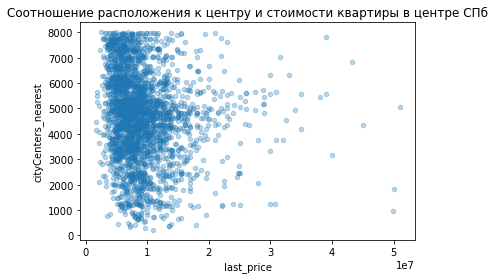

In [100]:
# построим диаграммы рассеяния для пар параметров
data_spb_center.plot(x='last_price', y='cityCenters_nearest', kind='scatter', alpha=0.3 )
plt.title('Соотношение расположения к центру и стоимости квартиры в центре СПб')
plt.show()

В самом Петербурге квариры продаются в основном в 5 км от центра со стоимостью от 4 до 8 млн руб.

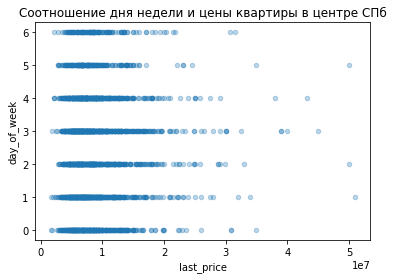

In [101]:
# построим диаграммы рассеяния для пар параметров
data_spb_center.plot(x='last_price', y='day_of_week', kind='scatter', alpha=0.3 )
plt.title('Соотношение дня недели и цены квартиры в центре СПб')
plt.show()

In [102]:
# высчитаем корреляцию
display(data_spb_center['last_price'].corr(data_spb_center['day_of_week']))

0.012435513527296977

Чаще всего и более дорогие обьявления публикуются в четверг. меньше всего в суб и воскр, хотя корреляция близка к 0, поэтому связью это трудер назвать

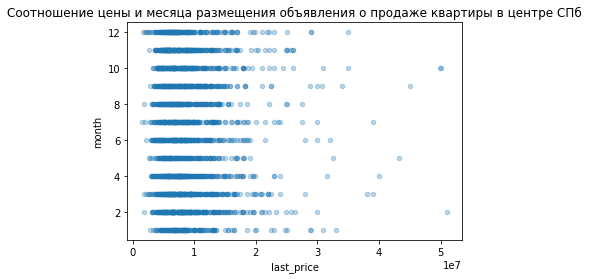

In [103]:
# построим диаграммы рассеяния для пар параметров
data_spb_center.plot(x='last_price', y='month', kind='scatter', alpha=0.3 )
plt.title('Соотношение цены и месяца размещения объявления о продаже квартиры в центре СПб')
plt.show()

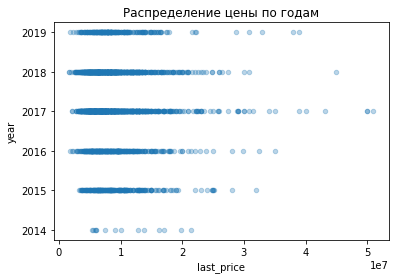

In [104]:
# построим диаграммы рассеяния для пар параметров
data_spb_center.plot(x='last_price', y='year', kind='scatter', alpha=0.3 )
plt.title('Распределение цены по годам')
plt.show()

Больше всего обьявлений было за 2018 и 2017 года, однако сами цены практиески не изменились.

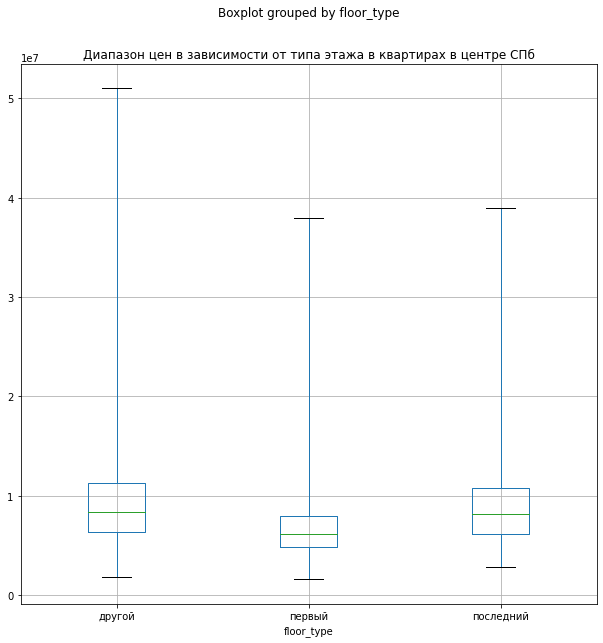

In [105]:
# строим диаграмму размаха
data_spb_center.boxplot('last_price', by='floor_type',figsize=(10,10),whis= 20)
plt.title('Диапазон цен в зависимости от типа этажа в квартирах в центре СПб')
plt.show()

Если хотите купить в Петербурге квартиру, а денег совсем мало, то можно рассмотреть кв на перовм этаже, медианное значение квартир на 1 этаже так же ниже, чем на остальных 5,5 млн, больше всего в цене квартиры на др этажах , медианная стоимость выше 6 млн руб.

В центре Петеребурга стоимость кваритры не зависит от высоты потолков или от дня неделе, месяца или года размещения обьявления, по_прежнему не очень любят покупать квартиры на 1 этаже, цена стартует от 900 тыс руб., а вот если хочется с красивым видом с верхних этажей, то придется заплатить побольше, стоимость квартиры начинается с 3 млн. руб. В центре Петербурга в радиусе 8км. ценовой разбег от 4 до 8 млн. руб. Конечная стоимость зависит от кол-ва комнат, и соответсвенно от площади квартиры, однако на 1 комн квартиры очень большой ценовой разбег от 900 тыс до 8 млн, на квартиры с 2,3,4 комнатами нижний порог каждый раз смещается в сторону увелечения до 4 млн, 5 млн и 7600 млн соответственно.


## Общий вывод

Общие закономерности: от года размещения стоимость не сильно менялась.По данным продаж квартир в Санкт_Петербурге и области Санкт_Петербург занимате почетное первое место по кол-ву обьявлений, стоиомсть 1 кв метра зависит от этажа, больше людей предпочитают этажы, отличные от 1 и последнего, медианная стоимость равна 80 т руб за кв м., тогда как на 1 и последнем 60 т руб. При анализе стоимости за 1 кв метр обнаружили, что с увелечением кол-ва комнат стоимость квадратного метра еле заметно снижается, в 1комн. квартире стоимость превышает 150 труб, а в 2 и 3 комн квартире уже даже меньше 150 т.руб.
В зависимости от удаленности от центра цена на 1 кв. м уменьшается, но не существенно с 80 т руб до 60 т руб.

В центре Санкт_Петербурга самый не популярный этаж ( возможно из-за шума и пыли) - 1, там можно купить самую дешевую квартиру, начиная от 900 т руб, а вот квартиры на последних этажах ценятся больше, мин стоимость начинается с 3 млн рублей, смотреть на красивую архитектуру Питера намного приятнее, чем на проезжую часть.
Минимальная стоимость квартиры в 2019 году изменилась не существенно и превысила 4 млн руб, тогда как за 3млн 200 можно было купить.
В  центре Санкт_Петербурга чаще продаются 2 комн квартиры, но есть и с 5 комнатами, макс цена доходит до 8 млн руб, квартиры в основном имеют площадь от 20 до 195 кв м. 